From [here](http://xrayphysics.com/mri.html).

## MARS Protocol:

#### Increasing the Bandwidth:

The default on the applet is $32 \pm 16$ KHz. This is the way GE way of expressing BW. 

We increase the BW to $64 \pm 32$ KHz (or given the default matrix of $\small N_{\text{freq}}\times N_{\text{phase}}=256 \times 256$ also expressed as $\small 32/N_{\text{freq}}=32/256=64,000 /256=250$ Hz/pixel) to decrease artifact manually and we observe the following consequences:

1. Concomitant automatic doubling of $G_x$ to $20$ mT/m from the baseline $10$ mT/m. This is necessary to maintain the FoV, which we will change but haven't changed yet.
2. The dwell time decreases to $\Delta \text tx= 0.02$ msec from the baseline $0.03$ msec. The sampling time will be $\Delta \text tx \times N_{\text{freq}} =4$ msec from $8$ msec.
3. SNR reduced by $1/\sqrt{64/16}=0.7$ or 30 percent.

#### Decreasing the FoV and increasing the matrix (increase in spatial resolution) - with Philips we would just reduce directly the voxel size (VS):

This will naturally increase noise, but decrease artifact due to metal. Say that the default of FoV $7.5$ cm (square) is decreased to $5$ cm, and the matrix is increased from $256$ to $400$ in the phase direction. Consequences:

1. [First change the FoV] Since we kept the FoV square "Rectangular" at 100%, there is a decrease in voxel size from $0.29 \times 0.29$ mm to $0.2\times 0.2$ mm. This will reduce the SNR by $0.2^2/0.29^2=0.47\sim 0.5,$ which compounds with the drop from the change in BW above results in an overall drop of $0.7 \times 0.5=0.3.$
2. [Now change the matrix] There will be an increase in sampling time $\Delta \text tx \times N_{\text{freq}}= 0.02 \times 400= 8$ msec. The pixel size will decrease from $5/256=0.02$ mm to $5/400=0.0125\sim 0.2$ mm.

Decreasing slice thickness cannot be simulated on the applet, but it would be done in clinical practice.

#### Increasing the NEX is probably not feasible at this point to regain SNR because of time constraints.
 


 

## Rectangular FoV of 50% (example) (FoV in the phase dir $\small 3.8$ cm):

This is what I simulated taking every other entry in the phase direction from "k space" on the doggy's picture, or the axial oblique acquisition of the hip in the protocols.

Consequences:

1. Need to oversample in the foldover direction to avoid wraparound. This will cancel at least in part the decrease in scan time displayed on the applet.
2. The matrix in the phase direction will half from $256$ to $128.$
3. SNR will decrease by $\sqrt{N_{\text{phase}}\text { ratio}}=\sqrt {1/2}=0.7.$


<Figure size 432x288 with 0 Axes>

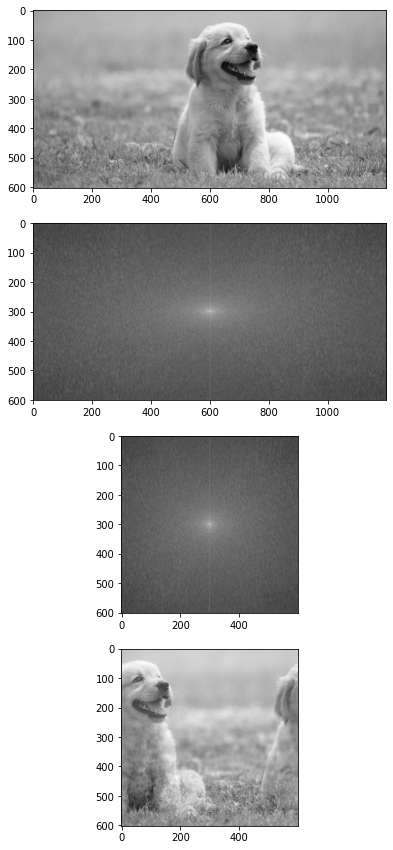

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
doggy = cv2.imread('doggy.jpg',0)
# fft 
fdog = np.fft.fft2(doggy)
# shift the center
fdogshifted = np.fft.fftshift(fdog)
freqdog = np.log(np.abs(fdogshifted))
# Rectangular FoV: Eliminating every other frequency (50 percent) leaves the Bw intact, and increases spacing between 
# Frequencies in k-space. The matrix (in the phase direction to save time) will be reduced by half.
z = fdogshifted
matz = z[:,np.arange(0,np.shape(z)[1],2)] # Takes out every other column off the frequencies.
freqz = np.log(np.abs(matz))
# inverse fft 
fz_ishift = np.fft.ifftshift(matz)
img_back_z = np.fft.ifft2(matz)
img_back_z = np.abs(img_back_z)


plt.figure()
f, axarr = plt.subplots(4,1, sharex=False, sharey=True) 
f.set_figheight(15)
f.set_figwidth(300)
axarr[0].imshow(doggy, cmap = 'gray')
axarr[1].imshow(freqdog, cmap='gray')
axarr[2].imshow(freqz, cmap='gray')
axarr[3].imshow(img_back_z, cmap = 'gray')

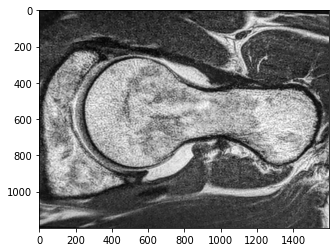

In [2]:
# Here is the clinical application where the decreased SNR would be controlled by oversampling:
plt.imshow(cv2.imread('hip.jpg',0),cmap = 'gray')

## Scan percentage 50%:

We have discussed this more than anything else. We are talking about keeping the matrix unchanged, but covering the phase direction without prohibitively long times by using rectangular pixels (remember cobblestones). The matrix changes from $256 \times 256$ to $256 \times 128.$ Consequences:

1. Intended decrease scan time - linear from baseline of $32$ sec to $16$ sec.
2. Increase in SNR because of bigger voxels: linear in the increase in the phase direction of the voxel from $0.29$ mm to $75\text{mm (FoV)}/128\text{ matrix}=0.59.$ Hence the SNR would increase $0.59/0.29= 2.$ But not so fast! Under the squarew root in $\small\text{VS}\sqrt{\frac{\text{NEX}\times N_{\text{phase}}}{\text{BW}}}$ we need to account for the change in phase steps $(\sqrt{1/2}).$ Hence, the real increase is just $\sqrt 2=1.414.$

It is this:

![](https://user-images.githubusercontent.com/9312897/150150561-4ea0d9eb-1678-48f9-b969-f3e52fdbc883.png)

and this:

<img src="https://user-images.githubusercontent.com/9312897/150150804-3133f99e-4758-4a47-9319-c72f7ddea349.png"  width="320" height="300" />

## Half-Fourier (NEX = 0.5) 

Eliminates shy of 50 percent of k-space thanks to symmetry in the RF captured back from the patient. In Micah's case (below) the SNR at 0.51 will be reflected as an approximate 30 percent loss with a reduction in acquisition time of nearly 50 percent.


(602, 1200)
(311,)


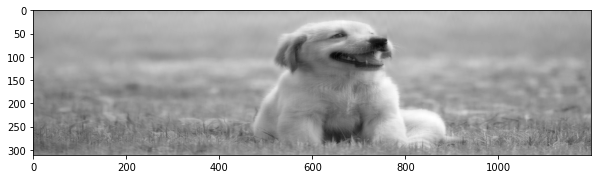

In [3]:
print(np.shape(z))
print(np.shape(np.arange(0, np.floor(np.shape(z)[0]/2) + 10, dtype=int)))
matz = z[np.arange(0, np.floor(np.shape(z)[0]/2) + 10, dtype=int)] 
freqz = np.log(np.abs(matz))
# inverse fft 
fz_ishift = np.fft.ifftshift(matz)
img_back_z = np.fft.ifft2(matz)
img_back_z = np.abs(img_back_z)
plt.figure(figsize=(10, 10)) 
plt.imshow(img_back_z,cmap='gray')

## Half the matrix size from $256$ to $128$ with same FOV

This will result in doubling the voxel size in both phase and frequency directions. Larger pixels will immediately reduce the ability to separate points in space (reduce spatial resolution) with the advantage of reducing noise (more averaging of extreme fluctuations unrelated to informative content in each pixel). The SNR will increase $\times 4$? No, not really because inside the square root there will be a decrease of $1/2$ by cutting down the phase steps. Hence it will be a net $4/\sqrt 2=2.8$ improvement.

The scan time will decrease linearly (half).

<img src="https://user-images.githubusercontent.com/9312897/152430729-a3936daa-198e-4a3b-9c4e-97050df706ff.png"  width="520" height="380" />
